In [2]:
import pandas as pd
df=pd.read_csv('../data/Combined.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,movie_id,description,genre,Image
0,tt1798632,A young girl tries to understand how she myste...,horror,[[[ 35 11 11]\n [ 35 11 11]\n [ 35 11 ...
1,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,[[[ 75 105 97]\n [ 69 99 91]\n [ 60 89 ...
2,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,[[[254 254 254]\n [254 254 254]\n [254 254 2...
3,tt7149730,A reformed hunter living in isolation on a wil...,action,[[[ 77 88 94]\n [ 74 85 91]\n [ 70 81 ...
4,tt3876910,A reformed sociopath journeys to a remote isla...,action,[[[244 228 195]\n [244 228 195]\n [244 228 1...


In [23]:
import pandas as pd
df=pd.read_csv('../data/Description.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
len(df)

101598

<Axes: xlabel='genre'>

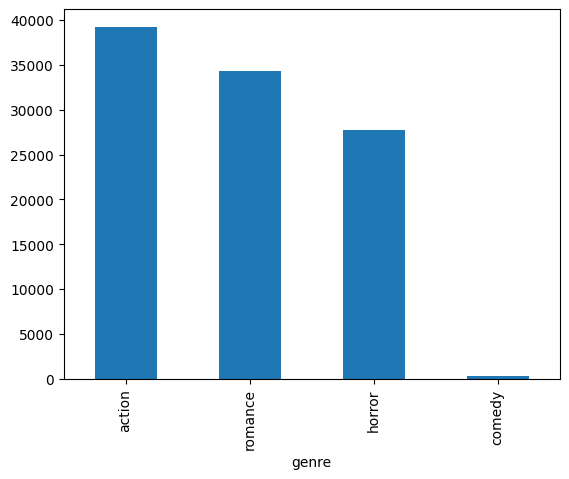

In [26]:
df['genre'].value_counts().plot(kind='bar')

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter


# Instantiate the SentenceTransformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate contextual embeddings for movie descriptions
texts = df['description'].tolist()
embeddings = model.encode(texts)

# Get the labels (genres)
labels = df['genre'].values

# Print original distribution
print("Original class distribution:", Counter(labels))

# Use SMOTE to oversample the minority class (here, 'comedy')
# Use k_neighbors=3 due to very few samples for the comedy class
smote = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(embeddings, labels)

# Print new distribution after oversampling
print("Resampled class distribution:", Counter(y_resampled))

# X_resampled now contains the oversampled embeddings,
# and y_resampled contains the corresponding genre labels.
# These can be used to train your downstream classifier.
